### Imports and Data Pre-Processing

In [1]:
# Optional, Run only if packages not present
! pip install pandas
! pip install sklearn
! pip install tensorflow_decision_forests
! pip install dtreeviz

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow_decision_forests as tfdf
import dtreeviz
from operator import itemgetter

# df = pd.read_excel('/content/drive/MyDrive/Data-RF.xlsx') #Location of excel file
df = pd.read_excel('./Data-RF.xlsx')

df.head()

,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Gender,Attendance,Grade
0,13.00,24,66.0,Male,High,A
1,15.00,24,67.0,Female,High,A
2,5.25,24,45.0,Male,High,B-
3,2.75,19,34.0,Male,High,C-
4,7.25,24,30.0,Male,High,C-


In [3]:
classes = df['Grade'].unique().tolist()
classes.sort(reverse = True)
print(f"Label classes: {classes}")
df['Grade'] = df['Grade'].map(classes.index)

att_map = {
    'High':2,
    'Moderate':1,
    'Low':0
}
df['Attendance'] = df['Attendance'].map(att_map)

df.head()

Label classes: ['E', 'D', 'C-', 'C', 'B-', 'B', 'A-', 'A']


,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Gender,Attendance,Grade
0,13.00,24,66.0,Male,2,7
1,15.00,24,67.0,Female,2,7
2,5.25,24,45.0,Male,2,4
3,2.75,19,34.0,Male,2,2
4,7.25,24,30.0,Male,2,2


In [4]:
# Accounting for errored data in gender column
# classes = df['Gender'].unique().tolist()
# len(classes)

gender_map = {
    'Male':1,
    'Male ':1,
    'Female':0,
    'Female ':0
}
df['Gender'] = df['Gender'].map(gender_map)

# classes = df['Gender'].unique().tolist()
# len(classes)
print(df.head())

   Lab-Test1(30)  Lab-Test2(24)  Midsem Test (90)  Gender  Attendance  Grade
0          13.00             24              66.0       1           2      7
1          15.00             24              67.0       0           2      7
2           5.25             24              45.0       1           2      4
3           2.75             19              34.0       1           2      2
4           7.25             24              30.0       1           2      2


### Data Split

In [5]:
train, test = train_test_split(df, test_size=0.3, random_state=12, shuffle=True) #Random State added to create a reproducable output
print(df.head())
df.info()
train.info()
test.info()

   Lab-Test1(30)  Lab-Test2(24)  Midsem Test (90)  Gender  Attendance  Grade
0          13.00             24              66.0       1           2      7
1          15.00             24              67.0       0           2      7
2           5.25             24              45.0       1           2      4
3           2.75             19              34.0       1           2      2
4           7.25             24              30.0       1           2      2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Lab-Test1(30)     500 non-null    float64
 1   Lab-Test2(24)     500 non-null    int64  
 2   Midsem Test (90)  500 non-null    float64
 3   Gender            500 non-null    int64  
 4   Attendance        500 non-null    int64  
 5   Grade             500 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 23.6 KB
<class 

In [6]:
train_tf = tfdf.keras.pd_dataframe_to_tf_dataset(train, label="Grade")
test_tf = tfdf.keras.pd_dataframe_to_tf_dataset(test, label="Grade")

### Default Model

In [7]:
model = tfdf.keras.RandomForestModel()
model.fit(train_tf)

model.compile(metrics=["accuracy"])
evaluation = model.evaluate(test_tf, return_dict=True)
for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

# model.save("savedModels/basicModel")

Use /tmp/tmpckfsy49c as temporary training directory
Reading training dataset...
Training dataset read in 0:00:05.054146. Found 350 examples.
Training model...
Model trained in 0:00:00.200564
Compiling model...
Model compiled.
1/1 [==============================] - 0s 328ms/step - loss: 0.0000e+00 - accuracy: 0.8667
loss: 0.0000
accuracy: 0.8667


In [8]:
model.summary() # Roughly 300 trees

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (5):
	Attendance
	Gender
	Lab-Test1(30)
	Lab-Test2(24)
	Midsem_Test_(90)

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1. "Midsem_Test_(90)"  0.806596 ################
    2.    "Lab-Test1(30)"  0.373358 #####
    3.    "Lab-Test2(24)"  0.164826 
    4.       "Attendance"  0.157800 
    5.           "Gender"  0.157754 

Variable Importance: NUM_AS_ROOT:
    1. "Midsem_Test_(90)" 240.000000 ################
    2.    "Lab-Test1(30)" 60.000000 

Variable Importance: NUM_NODES:
    1. "Midsem_Test_(90)" 4334.000000 ################
    2.    "Lab-Test1(30)" 4302.000000 ###############


In [9]:
with open("defModel.html","w") as f:f.write(tfdf.model_plotter.plot_model(model, max_depth=4))
tfdf.model_plotter.plot_model_in_colab(model, max_depth=4)
# model.make_inspector().features()
# model.make_inspector().variable_importances()
# model.make_inspector().evaluation()

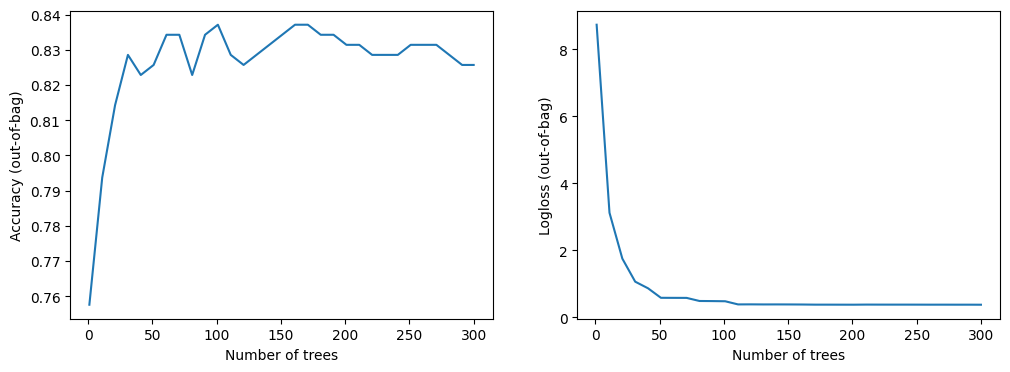

In [10]:
# For current DT with ~300 trees
logs = model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")
plt.savefig('defaultModelAcc.png')
plt.show()

### Improved Model

In [11]:
tuner = tfdf.tuner.RandomSearch(num_trials=20)
tuner.choice("max_depth", [4, 5, 6, 7])
tuned_model = tfdf.keras.RandomForestModel(tuner=tuner)
tuned_model.fit(train_tf)

tuned_model.compile(metrics=["accuracy"])
evaluation = tuned_model.evaluate(test_tf, return_dict=True)
for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

Use /tmp/tmpb50hww13 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.171608. Found 350 examples.
Training model...
Model trained in 0:00:00.385183
Compiling model...
Model compiled.
1/1 [==============================] - 0s 113ms/step - loss: 0.0000e+00 - accuracy: 0.8733
loss: 0.0000
accuracy: 0.8733


In [12]:
# tuned_model.summary()
tfdf.model_plotter.plot_model_in_colab(tuned_model, max_depth=4)

with open("imprModel.html","w") as f:f.write(tfdf.model_plotter.plot_model(tuned_model, max_depth=4))

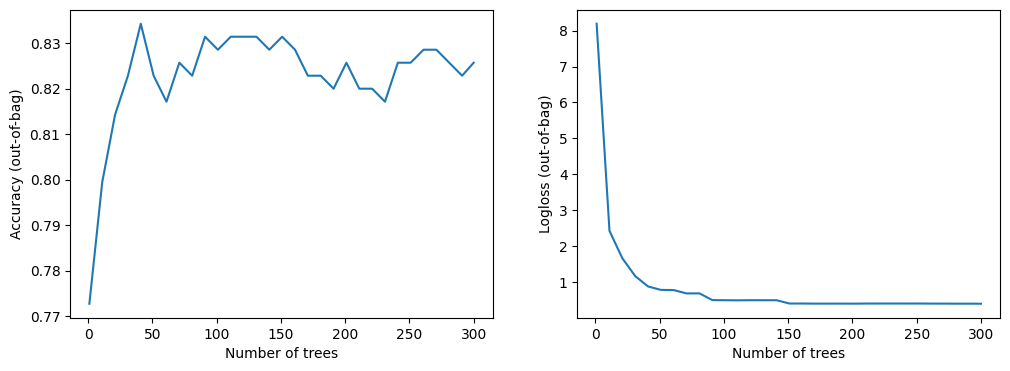

In [13]:
logs = tuned_model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")
plt.savefig('tunedModelAcc.png')
plt.show()

### Reduced Model (30 DTs)

In [14]:
red_model = tfdf.keras.RandomForestModel(num_trees = 30)
red_model.fit(train_tf)

red_model.compile(metrics=["accuracy"])
evaluation = red_model.evaluate(test_tf, return_dict=True)
acc_red_model = 0
for name, value in evaluation.items():
  acc_red_model = value
  print(f"{name}: {value:.4f}")

# red_model.save("savedModels/reducedModel")

Use /tmp/tmp9b7fayzw as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.157568. Found 350 examples.
Training model...
Model trained in 0:00:00.031712
Compiling model...
Model compiled.
1/1 [==============================] - 0s 105ms/step - loss: 0.0000e+00 - accuracy: 0.8800
loss: 0.0000
accuracy: 0.8800


In [15]:
tfdf.model_plotter.plot_model_in_colab(red_model, max_depth=4)

with open("redModel.html","w") as f:f.write(tfdf.model_plotter.plot_model(red_model, max_depth=4))

In [37]:
classes = list(df['Grade'].unique())
classes.sort(reverse=True)
print(classes)
print(train.drop(['Grade'],  axis='columns').head())
tree = red_model.make_inspector().extract_tree(0)
features = [name.replace(' ', '_') for name in train.drop('Grade', axis = 'columns').columns]
viz_cmodel = dtreeviz.model(red_model,
                           tree_index=0,
                           X_train=train.drop('Grade', axis = 'columns'),
                           y_train=train['Grade'],
                          feature_names =features,
                           target_name="Grade",
                           class_names=classes)
v = viz_cmodel.view()
v.save('./tree.svg')

[7, 6, 5, 4, 3, 2, 1, 0]
     Lab-Test1(30)  Lab-Test2(24)  Midsem Test (90)  Gender  Attendance
482          10.50             24              53.0       0           2
137           3.75             24              45.0       1           2
306          17.75             24              76.0       1           2
400          10.50             24              39.0       1           2
43            3.75             24              52.0       0           2


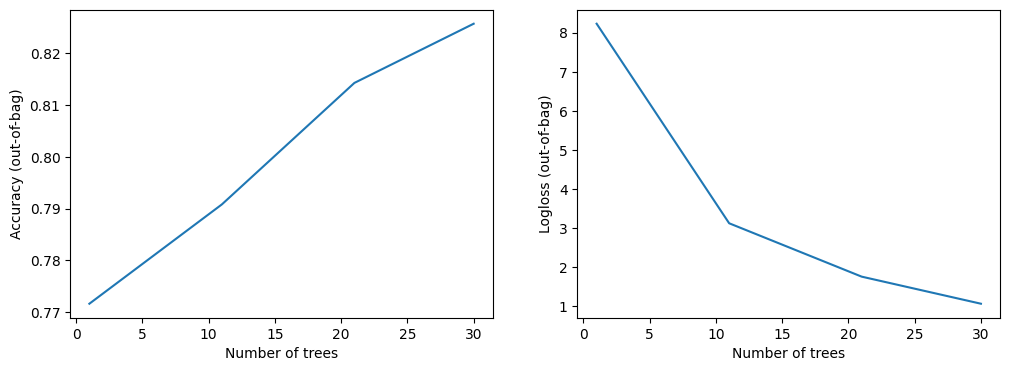

In [16]:
logs = red_model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")
plt.savefig('reducedModelAcc.png')
plt.show()

### Without Encoding

In [17]:
# df2 = pd.read_excel('/content/drive/MyDrive/Data-RF.xlsx') #Location of excel file
df2 = pd.read_excel('./Data-RF.xlsx')
train2, test2 = train_test_split(df2, test_size=0.3, random_state=12, shuffle=True) #Random State added to create a reproducable output
train_tf2 = tfdf.keras.pd_dataframe_to_tf_dataset(train2, label="Grade")
test_tf2 = tfdf.keras.pd_dataframe_to_tf_dataset(test2, label="Grade")

model_unencoded = tfdf.keras.RandomForestModel()
model_unencoded.fit(train_tf2)

model_unencoded.compile(metrics=["accuracy"])
evaluation = model_unencoded.evaluate(test_tf2, return_dict=True)
for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

model_unencoded.summary()

Use /tmp/tmpwg20y8kn as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.162938. Found 350 examples.
Training model...
Model trained in 0:00:00.186661
Compiling model...
Model compiled.
1/1 [==============================] - 0s 117ms/step - loss: 0.0000e+00 - accuracy: 0.8733
loss: 0.0000
accuracy: 0.8733
Model: "random_forest_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (5):
	Attendance
	Gender
	Lab-Test1(30)
	Lab-Test2(24)
	Midsem_Test_(90)

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1. "Midsem_Test_(90)"  0.806596 ################
    2.    "Lab-Test1(30)"  0.373624 #####
    3.    "Lab-Test2(24)"  0.

Though we expect a decrease in accuracy, due to randomness and limited data, accuracy is slightly improved (<1%)

### Gradient Boosted Decision Trees

In [28]:
gbdt = tfdf.keras.GradientBoostedTreesModel(num_trees = 30) #To make comparison unbiased
gbdt.fit(train_tf)

gbdt.compile(metrics=["accuracy"])
evaluation = gbdt.evaluate(test_tf, return_dict=True)
acc_gbdt = 0
for name, value in evaluation.items():
  acc_gbdt = value
  print(f"{name}: {value:.4f}")

# gbdt.save("savedModels/gradBoostedDT")

Use /tmp/tmp15aedqn3 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.200582. Found 350 examples.
Training model...
Model trained in 0:00:00.313307
Compiling model...
Model compiled.
1/1 [==============================] - 0s 113ms/step - loss: 0.0000e+00 - accuracy: 0.8733
loss: 0.0000
accuracy: 0.8733


In [29]:
tfdf.model_plotter.plot_model_in_colab(gbdt, max_depth=4)

with open("gbdt.html","w") as f:f.write(tfdf.model_plotter.plot_model(gbdt, max_depth=4))

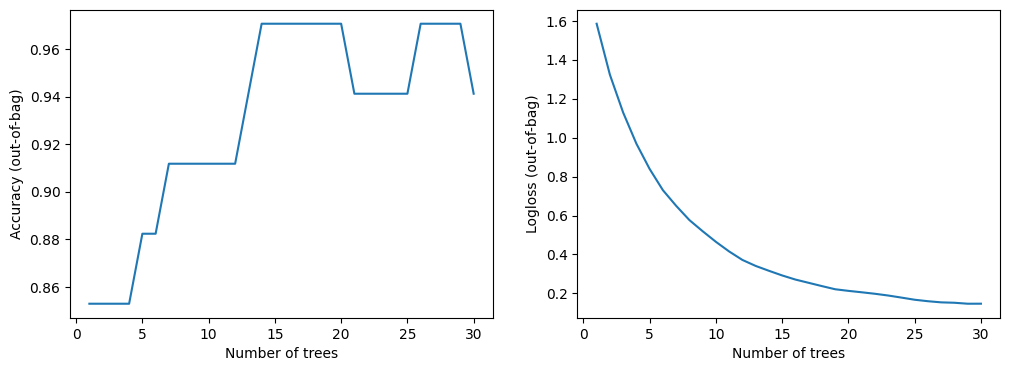

In [20]:
logs = gbdt.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")
plt.savefig('gbdtAcc.png')
plt.show()

In [21]:
print(f"Accuracy of RandomForests Model (30 Trees) = {acc_red_model}")
print(f"Accuracy of GradientBoostedDecisionTree Model (30 Trees) = {acc_gbdt}")

Accuracy of RandomForests Model (30 Trees) = 0.8799999952316284
Accuracy of GradientBoostedDecisionTree Model (30 Trees) = 0.8733333349227905


### Analysis of Parameters in Random Forests

In [22]:
red_model.compile(metrics=["accuracy"])
train_evaluation = red_model.evaluate(train_tf, return_dict=True)
for name, value in train_evaluation.items():
  if value == 0:
    continue
  print(f"Train Accuracy = {value:.4f}")

test_evaluation = red_model.evaluate(test_tf, return_dict=True)
for name, value in test_evaluation.items():
  if value == 0:
    continue
  print(f"Test Accuracy = {value:.4f}")

1/1 [==============================] - 0s 175ms/step - loss: 0.0000e+00 - accuracy: 0.9543
Train Accuracy = 0.9543
1/1 [==============================] - 0s 99ms/step - loss: 0.0000e+00 - accuracy: 0.8800
Test Accuracy = 0.8800


Train Accuracy is considerably higher than test accuracy

Check - Need to write # of trees beyond which guaranteed

In [23]:
numtrees = []
for i in range(1, 301):
    red_model = tfdf.keras.RandomForestModel(num_trees = i)
    red_model.fit(train_tf)

    red_model.compile(metrics=["accuracy"])
    evaluation = red_model.evaluate(test_tf, return_dict=True)
    acc_red_model = 0
    for name, value in evaluation.items():
      if name == 'accuracy':
        numtrees.append([i, value])

Use /tmp/tmp6sg9xop_ as temporary training directory
Reading training dataset...


Training dataset read in 0:00:00.167134. Found 350 examples.
Training model...
Model trained in 0:00:00.015037
Compiling model...


Model compiled.


1/1 [==============================] - 0s 108ms/step - loss: 0.0000e+00 - accuracy: 0.7733
Use /tmp/tmpjf8efq95 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.155642. Found 350 examples.
Training model...
Model trained in 0:00:00.018775
Compiling model...
Model compiled.
1/1 [==============================] - 0s 107ms/step - loss: 0.0000e+00 - accuracy: 0.7333
Use /tmp/tmphb3f4pd9 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.162728. Found 350 examples.
Training model...
Model trained in 0:00:00.017299
Compiling model...
Model compiled.
1/1 [==============================] - 0s 128ms/step - loss: 0.0000e+00 - accuracy: 0.8467
Use /tmp/tmp1ed0q5z6 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.159391. Found 350 examples.
Training model...
Model trained in 0:00:00.018501
Compiling model...
Model compiled.
1/1 [==============================] - 0s 107m

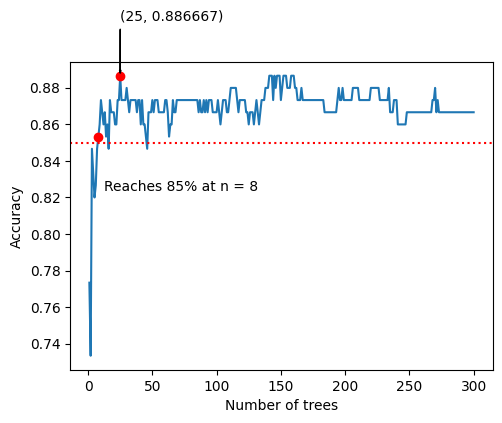

In [51]:
# Number of Trees
# In the process find out if increasing n_trees hyper-parameter leads to more robust and accurate trees.
# logs = model.make_inspector().training_logs()
# Get the maximum value from the data
max_tuple = max(numtrees, key=itemgetter(1))
max_x = max_tuple[0]
max_y = round(max_tuple[1],6)
max_tuple = max_x, max_y
# print(max_tuple)

#Calculate first index where acc >= 85%
firstind = 0
firstacc = 0
for ind, acc in numtrees:
  if(acc >= 0.85):
    firstind = ind
    firstacc = acc
    break
# print(firstind)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
# plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.plot([tree[0] for tree in numtrees], [tree[1] for tree in numtrees])
plt.axhline(y = 0.85,color =  'r',linestyle = 'dotted')
plt.annotate(str(max_tuple), xy=(max_x, max_y), xytext=(max_x + 0.03, max_y + 0.03),
arrowprops=dict(facecolor='black',headwidth=1, headlength=2,width=0.1, shrink=0.05))
plt.plot(max_x, max_y, 'ro')
plt.plot(firstind, firstacc, 'ro')
plt.text(firstind + 4, firstacc - 0.03, f'Reaches 85% at n = {firstind}')
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.savefig('notrees.png', bbox_inches='tight')

# Plot for both

In [26]:
# Maximum Depth
trees = []
for i in range(1, 33):
    red_model = tfdf.keras.RandomForestModel(num_trees = 30, max_depth = i)
    red_model.fit(train_tf)

    red_model.compile(metrics=["accuracy"])
    evaluation = red_model.evaluate(test_tf, return_dict=True)
    acc_red_model = 0
    for name, value in evaluation.items():
      if name == 'accuracy':
        trees.append([i, value])


Use /tmp/tmpos4mqpc1 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.195633. Found 350 examples.
Training model...
Model trained in 0:00:00.016570
Compiling model...
Model compiled.
1/1 [==============================] - 0s 109ms/step - loss: 0.0000e+00 - accuracy: 0.2733
Use /tmp/tmpuuuae8f4 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.200725. Found 350 examples.
Training model...
Model trained in 0:00:00.016688
Compiling model...
Model compiled.
1/1 [==============================] - 0s 113ms/step - loss: 0.0000e+00 - accuracy: 0.3867
Use /tmp/tmpq0kk6u8k as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.195331. Found 350 examples.
Training model...
Model trained in 0:00:00.020820
Compiling model...
Model compiled.
1/1 [==============================] - 0s 105ms/step - loss: 0.0000e+00 - accuracy: 0.4933
Use /tmp/tmpdx_xjyc_ as temporary training dir

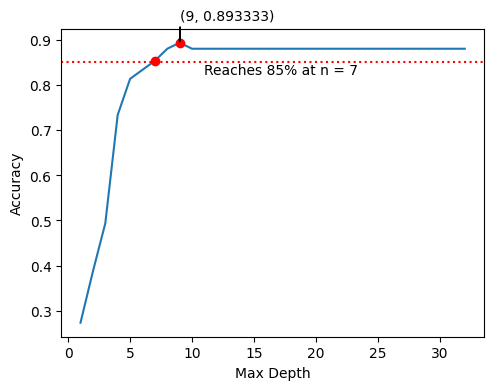

In [50]:
plt.figure(figsize=(12, 4))
# print(trees)

# Get the maximum value from the data
max_tuple = max(trees, key=itemgetter(1))
max_x = max_tuple[0]
max_y = round(max_tuple[1],6)
max_tuple = max_x, max_y
# print(max_tuple)

#Calculate first index where acc >= 85%
firstind = 0
firstacc = 0
for ind, acc in trees:
  if(acc >= 0.85):
    firstind = ind
    firstacc = acc
    break
# print(firstind)

plt.subplot(1, 2, 1)
plt.plot([tree[0] for tree in trees], [round(tree[1],6) for tree in trees])
plt.axhline(y = 0.85,color =  'r',linestyle = 'dotted')
plt.annotate(str(max_tuple), xy=(max_x, max_y), xytext=(max_x + 0.05, max_y + 0.05),
arrowprops=dict(facecolor='black',headwidth=1, headlength=2,width=0.1, shrink=0.05))
plt.plot(max_x, max_y, 'ro')
plt.plot(firstind, firstacc, 'ro')
plt.text(firstind + 4, firstacc - 0.03, f'Reaches 85% at n = {firstind}')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.savefig('deptrees.png', bbox_inches='tight')